In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

Leemos nuestro dataframe

In [217]:
train = pd.read_csv(r'properties_colombia_train.csv')

Eliminamos la notación cientifica de price

In [218]:
pd.options.display.float_format = '{:.2f}'.format

Eliminamos las columnas que no vamos a usar

In [219]:
train = train.drop(['Unnamed: 0','id','ad_type','operation_type','price_period','geometry' , 'l4' , 'l5' , 'l6' ,'rooms' , 'bedrooms' ,'surface_total' , 'surface_covered' , 'title' , 'description' , 'start_date' , 'end_date' , 'created_on'] , axis=1)

Analizamos nuestros datos nulos

In [220]:
train.isnull().sum()

lat              49498
lon              49498
l1                   0
l2                   0
l3               11032
bathrooms        41082
price               63
currency            67
property_type        0
dtype: int64

Codificamos nuestras variables categóricas

In [221]:
encoder = preprocessing.LabelEncoder()

In [222]:
train.columns

Index(['lat', 'lon', 'l1', 'l2', 'l3', 'bathrooms', 'price', 'currency',
       'property_type'],
      dtype='object')

In [223]:
train['l1'] = encoder.fit_transform(train.l1.values)
train['l2'] = encoder.fit_transform(train.l2.values)
train['l3'] = encoder.fit_transform(train.l3.values)
train['property_type'] = encoder.fit_transform(train.property_type.values)
train['currency'] = encoder.fit_transform(train.currency.values)

Identificamos previamente un dato nulo en la columna l3

In [224]:
train['l3'].head(5) #Nulos valen 293

0    148
1     27
2     27
3     29
4    148
Name: l3, dtype: int32

Utilizamos un modelo predictivo para completar los valores nulos

In [225]:
l3_not_null= train[train.l3!=293]
l3_null = train[train.l3==293]


Lo entrenamos con las siguientes columnas


In [226]:
features =['l1' , 'l2']

In [227]:
y = l3_not_null['l3']
X = l3_not_null[features]

Entrenamos el modelo

In [228]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [229]:
X = l3_null[features]
predicted_l3 =model.predict(X)

In [230]:
predicted_l3

array([ 72.65958513,  72.65958513,  79.9330715 , ...,  74.47795673,
        72.65958513, 105.39027379])

Remplazamos nuestro codigo correspondiente al dato nulo por nuestros codigos predictivos

In [231]:
train.loc[train.l3==293, 'l3'] = predicted_l3

Como vemos no hay mas valores nulos en la columna l3

In [232]:
train.isnull().sum()

lat              49498
lon              49498
l1                   0
l2                   0
l3                   0
bathrooms        41082
price               63
currency             0
property_type        0
dtype: int64

Hacemos lo mismo con latitud

In [233]:
lat_not_null = train.drop(train[train.lat.isnull()].index)
lat_null = train.drop(lat_not_null.index)

In [234]:
features = ["l1", "l2", "l3"]

In [235]:
y = lat_not_null['lat']
X = lat_not_null[features]

In [236]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [237]:
X = lat_null[features]
predicted_lat =model.predict(X)

In [238]:
train.loc[train.lat.isnull(), 'lat'] = predicted_lat

Con longitud

In [239]:
lon_not_null = train.drop(train[train.lon.isnull()].index)
lon_null = train.drop(lon_not_null.index)

In [240]:
features = ["l1", "l2", "l3" , 'lat']

In [241]:
y = lon_not_null['lat']
X = lon_not_null[features]

In [242]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [243]:
X = lon_null[features]
predicted_lon =model.predict(X)

In [244]:
train.loc[train.lon.isnull(), 'lon'] = predicted_lon

Con bathrooms

In [245]:
bath_not_null = train.drop(train[train.bathrooms.isnull()].index)
bath_null = train.drop(bath_not_null.index)

In [246]:
features = ["l1", "l2", "l3" , 'lat','lon' , 'property_type']

In [247]:
y = bath_not_null['bathrooms']
X = bath_not_null[features]

In [248]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [249]:
X = bath_null[features]
predicted_bath =model.predict(X)

In [250]:
train.loc[train.bathrooms.isnull(), 'bathrooms'] = predicted_bath

Y con price para luego crear nuestra columna target 

In [251]:
price_not_null = train.drop(train[train.price.isnull()].index)
price_null = train.drop(price_not_null.index)

In [252]:
features = ["l1", "l2", "l3" , 'lat','lon' , 'property_type' , 'bathrooms']

In [253]:
y = price_not_null['price']
X = price_not_null[features]

In [254]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [255]:
X = price_null[features]
predicted_price =model.predict(X)

In [256]:
train.loc[train.price.isnull(), 'price'] = predicted_price

No tenemos mas valores nulos

In [257]:
train.isnull().sum()

lat              0
lon              0
l1               0
l2               0
l3               0
bathrooms        0
price            0
currency         0
property_type    0
dtype: int64

Definimos nuestra columna target

In [258]:
target_val= train['price'].mean()
train['Target']= ['1' if s > target_val else '0' for s in train['price']]

Dropeamos la columna price

In [259]:
train = train.drop('price' , axis = 1)

Cambiamos el tipo de dato 

In [260]:
train = train.astype({'Target':'int32'} , copy = False)

Instanciamos nuestro modelo , en este caso Arbol de decision

In [261]:
tree = DecisionTreeClassifier()

Definimos features y etiquetas

In [262]:
X = train.drop('Target' , axis= 1)

In [263]:
y = train['Target']

Separamos nuestros datos de entrenamiento y testeo (del dataframe train)

In [264]:
X_train , X_test , y_train , y_test = train_test_split(X,y, train_size= 0.7)

In [265]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((138284, 8), (59265, 8), (138284,), (59265,))

Entrenamos nuestro modelo

In [266]:
tree.fit(X_train , y_train)

DecisionTreeClassifier()

Realizamos la prediccion 

In [267]:
y_train_pred = tree.predict(X_train)

Creamos nuestra matriz de confusion

In [268]:
m = confusion_matrix(y_train , y_train_pred)

In [269]:
m_display = ConfusionMatrixDisplay(m)

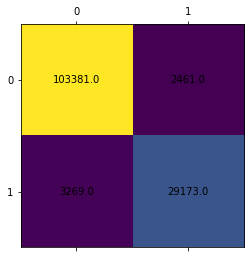

In [270]:
fig , ax = plt.subplots(figsize =(4,5))

ax.matshow(m)
for (i, j), z in np.ndenumerate(m):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

Mostramos nuestras metricas

In [271]:
print(f'Accuracy en el test: {round(accuracy_score(y_train, y_train_pred),4)}')

Accuracy en el test: 0.9586


In [272]:
print(f'Recall score en test: {round(recall_score(y_train, y_train_pred),4)}')

Recall score en test: 0.8992


Realizamos la misma preparación en nuestro dataframe de testeo

In [273]:
test = pd.read_csv(r'properties_colombia_test.csv')

In [274]:
test = test.drop(['Unnamed: 0','id','ad_type','operation_type','price_period','geometry' , 'l4' , 'l5' , 'l6' ,'rooms' , 'bedrooms' ,'surface_total' , 'surface_covered' , 'title' , 'description' , 'start_date' , 'end_date' , 'created_on'] , axis=1)

In [275]:
test['l1'] = encoder.fit_transform(test.l1.values)
test['l2'] = encoder.fit_transform(test.l2.values)
test['l3'] = encoder.fit_transform(test.l3.values)
test['property_type'] = encoder.fit_transform(test.property_type.values)
test['currency'] = encoder.fit_transform(test.currency.values)

In [276]:
test['l3'].head(5) #Nulos valen 262

0     24
1     67
2    135
3    135
4    135
Name: l3, dtype: int32

In [277]:
l3_not_null= test[test.l3!=262]
l3_null = test[test.l3==262]

In [278]:
features =['l1' , 'l2']

In [279]:
y = l3_not_null['l3']
X = l3_not_null[features]

In [280]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [281]:
X = l3_null[features]
predicted_l3 =model.predict(X)

In [282]:
test.loc[test.l3==262, 'l3'] = predicted_l3

In [283]:
lat_not_null = test.drop(test[test.lat.isnull()].index)
lat_null = test.drop(lat_not_null.index)

In [284]:
features = ["l1", "l2", "l3"]

In [285]:
y = lat_not_null['lat']
X = lat_not_null[features]

In [286]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [287]:
X = lat_null[features]
predicted_lat =model.predict(X)

In [288]:
test.loc[test.lat.isnull(), 'lat'] = predicted_lat

In [289]:
lon_not_null = test.drop(test[test.lon.isnull()].index)
lon_null = test.drop(lon_not_null.index)

In [290]:
features = ["l1", "l2", "l3" , 'lat']

In [291]:
y = lon_not_null['lat']
X = lon_not_null[features]

In [292]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [293]:
X = lon_null[features]
predicted_lon =model.predict(X)

In [294]:
test.loc[test.lon.isnull(), 'lon'] = predicted_lon

In [295]:
bath_not_null = test.drop(test[test.bathrooms.isnull()].index)
bath_null = test.drop(bath_not_null.index)

In [296]:
features = ["l1", "l2", "l3" , 'lat','lon' , 'property_type']

In [297]:
y = bath_not_null['bathrooms']
X = bath_not_null[features]

In [298]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [299]:
X = bath_null[features]
predicted_bath =model.predict(X)

In [300]:
test.loc[test.bathrooms.isnull(), 'bathrooms'] = predicted_bath

Realizamos la predicción sobre el dataframe test

In [301]:
y_test_pred = tree.predict(test)

Finalmente preparamos el dataframe para entregar

In [302]:
data_df = pd.DataFrame(y_test_pred , columns= ['pred'] )

In [303]:
data_df.to_csv('LeooNic.csv' , index = False)